In [25]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [26]:
df = pd.read_excel('02. flight-price.xlsx')

In [27]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [28]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [29]:
df.shape

(10683, 11)

In [30]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [31]:
df.duplicated().sum()

np.int64(220)

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df.dropna(subset=['Route'], inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


In [35]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [36]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [37]:
df['Source'].value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [38]:
df['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [39]:
df['Duration'].value_counts()

Duration
2h 50m     544
1h 30m     386
2h 45m     335
2h 55m     332
2h 35m     329
          ... 
37h 10m      1
32h 20m      1
40h 20m      1
13h 35m      1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [40]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [41]:
df['Price'].describe()

count    10462.000000
mean      9026.790289
std       4624.849541
min       1759.000000
25%       5224.000000
50%       8266.000000
75%      12344.750000
max      79512.000000
Name: Price, dtype: float64

# Feature Engineering

In [42]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [43]:
df['Hours'] = df['Duration'].str.split('h').str[0]
df['Minutes'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [44]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Hours,Minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,19,NaN


In [45]:
df['Minutes'] = df['Minutes'].fillna(0).astype(int)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
 11  Date             10462 non-null  object
 12  Month            10462 non-null  object
 13  Year             10462 non-null  object
 14  Hours            10462 non-null  object
 15  Minutes          10462 non-null  int64 
dtypes: int64(2), object(14)
memory usage: 1.4+ MB


In [51]:
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)
df['Hours'] = df['Hours'].astype(int)

In [48]:
df['Hours'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [49]:
mask = df['Hours']=='5m'

In [50]:
df.loc[mask, 'Hours']=0
df.loc[mask, 'Minutes']=5

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
 11  Date             10462 non-null  int64 
 12  Month            10462 non-null  int64 
 13  Year             10462 non-null  int64 
 14  Hours            10462 non-null  int64 
 15  Minutes          10462 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 1.4+ MB


In [53]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Hours,Minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,2,50


In [54]:
df.drop(columns=['Date_of_Journey', 'Duration'], inplace=True)

In [55]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [56]:
mask1 = df['Total_Stops']=='1 stop'
mask0 = df['Total_Stops']=='non-stop'
mask2 = df['Total_Stops']=='2 stops'
mask3 = df['Total_Stops']=='3 stops'
mask4 = df['Total_Stops']=='4 stops'

In [57]:
df.loc[mask0, 'Total_Stops'] = 0
df.loc[mask1, 'Total_Stops'] = 1
df.loc[mask2, 'Total_Stops'] = 2
df.loc[mask3, 'Total_Stops'] = 3
df.loc[mask4, 'Total_Stops'] = 4

In [58]:
df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Hours,Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0,No info,3897,24,3,2019,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2,No info,7662,1,5,2019,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2,No info,13882,9,6,2019,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1,No info,6218,12,5,2019,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1,No info,13302,1,3,2019,4,45


In [59]:
df['Total_Stops'] = df['Total_Stops'].astype(int)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Dep_Time         10462 non-null  object
 5   Arrival_Time     10462 non-null  object
 6   Total_Stops      10462 non-null  int64 
 7   Additional_Info  10462 non-null  object
 8   Price            10462 non-null  int64 
 9   Date             10462 non-null  int64 
 10  Month            10462 non-null  int64 
 11  Year             10462 non-null  int64 
 12  Hours            10462 non-null  int64 
 13  Minutes          10462 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.2+ MB


In [61]:
df['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3475
2    1318
3      43
4       1
Name: count, dtype: int64

<Axes: xlabel='Total_Stops', ylabel='Price'>

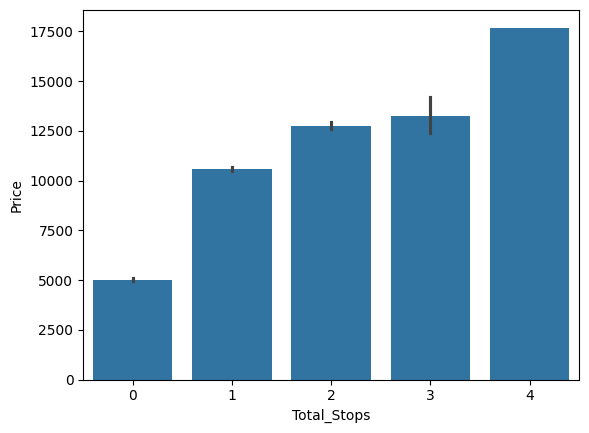

In [62]:
sns.barplot(x='Total_Stops', y='Price', data=df)

In [64]:
df['Arrival_Time'] = df['Arrival_Time'].str.split(' ').str[0]

In [66]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Hours,Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,0,No info,3897,24,3,2019,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2,No info,7662,1,5,2019,7,25


In [68]:
df['Arrival_Time'].unique()

array(['01:10', '13:15', '04:25', '23:30', '21:35', '11:25', '10:25',
       '05:05', '19:15', '23:00', '22:55', '13:55', '09:20', '19:50',
       '12:35', '19:20', '13:20', '06:50', '21:50', '08:15', '03:35',
       '12:55', '23:15', '21:00', '20:20', '16:45', '19:00', '18:10',
       '15:15', '08:35', '11:05', '14:15', '10:55', '00:15', '02:45',
       '12:00', '23:55', '01:30', '09:25', '15:25', '15:35', '08:30',
       '10:05', '14:30', '07:55', '10:35', '22:35', '04:40', '07:25',
       '20:45', '14:25', '22:30', '23:20', '07:40', '22:50', '14:35',
       '08:55', '18:50', '09:05', '01:35', '09:40', '16:25', '11:10',
       '17:05', '17:50', '23:10', '08:45', '07:45', '16:10', '00:55',
       '23:35', '20:00', '00:40', '21:45', '18:15', '03:25', '04:15',
       '21:10', '21:05', '09:45', '18:05', '22:00', '15:30', '08:50',
       '08:00', '19:35', '11:20', '10:15', '12:45', '02:20', '07:15',
       '11:50', '18:30', '19:45', '21:20', '20:05', '09:10', '22:20',
       '10:10', '01:

In [69]:
df['Arrival_Hours'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Minutes'] = df['Arrival_Time'].str.split(':').str[1]

In [71]:
df.drop(columns=['Arrival_Time'], inplace=True)

In [72]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Hours,Minutes,Arrival_Hours,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,0,No info,3897,24,3,2019,2,50,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2,No info,7662,1,5,2019,7,25,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2,No info,13882,9,6,2019,19,0,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,1,No info,6218,12,5,2019,5,25,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,1,No info,13302,1,3,2019,4,45,21,35


In [77]:
df['Dep_Hours'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_Minutes'] = df['Dep_Time'].str.split(':').str[1]
df.drop(columns=['Dep_Time'], inplace=True)

In [78]:
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Hours,Minutes,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,2019,2,50,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,2019,7,25,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,2019,19,0,04,25,09,25


In [79]:
df.rename(columns={'Hours': 'Duration_Hours', 'Minutes': 'Duration_Minutes'}, inplace=True)

In [80]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Duration_Hours,Duration_Minutes,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,2019,2,50,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,2019,7,25,13,15,05,50


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10462 non-null  object
 1   Source            10462 non-null  object
 2   Destination       10462 non-null  object
 3   Route             10462 non-null  object
 4   Total_Stops       10462 non-null  int64 
 5   Additional_Info   10462 non-null  object
 6   Price             10462 non-null  int64 
 7   Date              10462 non-null  int64 
 8   Month             10462 non-null  int64 
 9   Year              10462 non-null  int64 
 10  Duration_Hours    10462 non-null  int64 
 11  Duration_Minutes  10462 non-null  int64 
 12  Arrival_Hours     10462 non-null  int64 
 13  Arrival_Minutes   10462 non-null  int64 
 14  Dep_Hours         10462 non-null  int64 
 15  Dep_Minutes       10462 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 1.4+ MB


In [82]:
df['Arrival_Hours'] = df['Arrival_Hours'].astype(int)
df['Arrival_Minutes'] = df['Arrival_Minutes'].astype(int)
df['Dep_Hours'] = df['Dep_Hours'].astype(int)
df['Dep_Minutes'] = df['Dep_Minutes'].astype(int)


In [84]:
df.drop(columns=['Route'], inplace=True)

In [85]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Duration_Hours,Duration_Minutes,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,2,50,1,10,22,20
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,7,25,13,15,5,50
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,19,0,4,25,9,25
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,5,25,23,30,18,5
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,4,45,21,35,16,50


# So the Catagorical Data we have to preprocess is 
- Airline
- Source
- Destination
- Additional_Info
#### We have to transform them using sklearn.preprocessing.